In [1]:
import os 
from autogen import ConversableAgent
import autogen
import tempfile
from autogen.coding import LocalCommandLineCodeExecutor
from autogen import coding

In AutoGen, a code executor is a component that takes input messages (e.g., those containing code blocks), performs execution, and outputs messages with the results. AutoGen provides two types of built-in code executors, one is command line code executor, which runs code in a command line environment such as a UNIX shell, and the other is Jupyter executor, which runs code in an interactive Jupyter kernel.

For each type of executor, AutoGen provides two ways to execute code: locally and in a Docker container. One way is to execute code directly in the same host platform where AutoGen is running, i.e., the local operating system. It is for development and testing, but it is not ideal for production as LLM can generate arbitrary code. The other way is to execute code in a Docker container. The table below shows the combinations of code executors and execution environments.

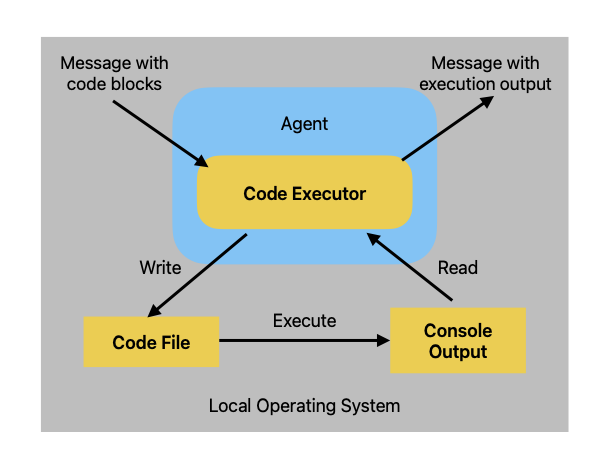

In [ ]:
config_list = [
 {
       
    }
]
llm_config = {
    "timeout": 600,  
    "use_cache": True,
    "config_list": config_list,
}

In [3]:
dir(coding)

['CodeBlock',
 'CodeExecutor',
 'CodeExecutorFactory',
 'CodeExtractor',
 'CodeResult',
 'DockerCommandLineCodeExecutor',
 'LocalCommandLineCodeExecutor',
 'MarkdownCodeExtractor',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'base',
 'docker_commandline_code_executor',
 'factory',
 'func_with_reqs',
 'local_commandline_code_executor',
 'markdown_code_extractor',
 'utils']

In [4]:
# Create a temporary directory to store the code files.
temp_dir = tempfile.TemporaryDirectory()

# Create a local command line code executor.
executor = LocalCommandLineCodeExecutor(
    timeout=10,  # Timeout for each code execution in seconds.
    work_dir=temp_dir.name,  # Use the temporary directory to store the code files.
)

# Create an agent with code executor configuration.
code_executor_agent = ConversableAgent(
    "code_executor_agent",
    llm_config=False,  # Turn off LLM for this agent.
    code_execution_config={"executor": executor},  # Use the local command line code executor.
    human_input_mode="ALWAYS",  # Always take human input for this agent for safety.
)

In [10]:
message_with_code_block = """This is a message with code block.
The code block is below:
```python
import numpy as np
import matplotlib.pyplot as plt
x = np.random.randint(0, 100, 100)
y = np.random.randint(0, 100, 100)
plt.scatter(x, y)
plt.savefig('scatter.png')
print('Scatter plot saved to scatter.png')
```
This is the end of the message.
"""

# Generate a reply for the given code.
reply = code_executor_agent.generate_reply(messages=[{"role": "user", "content": message_with_code_block}])
print(reply)


>>>>>>>> NO HUMAN INPUT RECEIVED.

>>>>>>>> USING AUTO REPLY...

>>>>>>>> EXECUTING CODE BLOCK (inferred language is python)...
exitcode: 0 (execution succeeded)
Code output: Scatter plot saved to scatter.png



In [ ]:
import os

print(os.listdir(temp_dir.name))
# We can see the output scatter.png and the code file generated by the agent.

In [11]:
temp_dir.cleanup()

## Use Code Execution in Conversation

In [15]:
# The code writer agent's system message is to instruct the LLM on how to use
# the code executor in the code executor agent.
code_writer_system_message = """You are a helpful AI assistant.
Solve tasks using your coding and language skills.
In the following cases, suggest python code (in a python coding block) or shell script (in a sh coding block) for the user to execute.
1. When you need to collect info, use the code to output the info you need, for example, browse or search the web, download/read a file, print the content of a webpage or a file, get the current date/time, check the operating system. After sufficient info is printed and the task is ready to be solved based on your language skill, you can solve the task by yourself.
2. When you need to perform some task with code, use the code to perform the task and output the result. Finish the task smartly.
Solve the task step by step if you need to. If a plan is not provided, explain your plan first. Be clear which step uses code, and which step uses your language skill.
When using code, you must indicate the script type in the code block. The user cannot provide any other feedback or perform any other action beyond executing the code you suggest. The user can't modify your code. So do not suggest incomplete code which requires users to modify. Don't use a code block if it's not intended to be executed by the user.
If you want the user to save the code in a file before executing it, put # filename: <filename> inside the code block as the first line. Don't include multiple code blocks in one response. Do not ask users to copy and paste the result. Instead, use 'print' function for the output when relevant. Check the execution result returned by the user.
If the result indicates there is an error, fix the error and output the code again. Suggest the full code instead of partial code or code changes. If the error can't be fixed or if the task is not solved even after the code is executed successfully, analyze the problem, revisit your assumption, collect additional info you need, and think of a different approach to try.
When you find an answer, verify the answer carefully. Include verifiable evidence in your response if possible.
Reply 'TERMINATE' in the end when everything is done.
"""



In [ ]:
code_writer_agent = ConversableAgent(
    "code_writer_agent",
    system_message=code_writer_system_message,
    llm_config= llm_config,
    code_execution_config=False,  # Turn off code execution for this agent.
)

ValidationError: 2 validation errors for _LLMConfig
config_list.0.azure.api_base
  Extra inputs are not permitted [type=extra_forbidden, input_value='https://idkrag.openai.azure.com/', input_type=str]
    For further information visit https://errors.pydantic.dev/2.11/v/extra_forbidden
use_cache
  Extra inputs are not permitted [type=extra_forbidden, input_value=True, input_type=bool]
    For further information visit https://errors.pydantic.dev/2.11/v/extra_forbidden

In [ ]:
chat_result = code_executor_agent.initiate_chat(
    code_writer_agent,
    message="Write Python code to calculate the 14th Fibonacci number.",
)

In [ ]:
import datetime

today = datetime.datetime.now().strftime("%Y-%m-%d")
chat_result = code_executor_agent.initiate_chat(
    code_writer_agent,
    message=f"Today is {today}. Write Python code to plot TSLA's and META's "
    "stock price gains YTD, and save the plot to a file named 'stock_gains.png'.",
)

In [ ]:
from IPython.display import Image

Image(os.path.join(temp_dir, "stock_gains.png"))

 Here's a breakdown of each part, complete with explanations and code examples:Modules and Submodulesautogen.coding: This is the main module that organizes all the code execution-related functionalities within the AutoGen framework. It doesn't contain code that you would directly call, but rather serves as a container for the submodules and classes that do the actual work.autogen.coding.base: This submodule defines the fundamental building blocks for code execution. It contains abstract classes that specify how code execution should be handled, providing a consistent interface for different execution environments.autogen.coding.docker_commandline_code_executor: This submodule provides a concrete implementation for executing code within Docker containers. This is useful for isolating code execution and managing dependencies, ensuring that the executed code doesn't interfere with the host system.autogen.coding.factory: This submodule offers a factory class that helps create instances of code executors. Instead of directly instantiating a specific executor, you use the factory to get an appropriate executor based on your needs.autogen.coding.local_commandline_code_executor: This submodule provides a concrete implementation for executing code directly on the local machine's command line. This is a simpler approach than using Docker, but it lacks the isolation and dependency management features.autogen.coding.markdown_code_extractor: This submodule provides a class to extract code blocks from text formatted in Markdown. This is essential for AutoGen agents that communicate using Markdown, as it allows the system to identify and extract code snippets from agent responses.autogen.coding.utils: This submodule contains various utility functions used by the other modules within autogen.coding. These functions might include helper functions for file handling, string manipulation, or other common tasks.Classes and FunctionsHere's an explanation of each class and function, along with code examples:CodeBlock (from autogen.coding.base)Description: The CodeBlock class represents a single unit of code that needs to be executed. It encapsulates the actual code string, the programming language of the code, and any other relevant metadata.Code Example:from autogen.coding.base import CodeBlock

# Create a CodeBlock object
python_code = CodeBlock(code="print('Hello, world!')", language="python")

# Access the code and language
print(f"Code: {python_code.code}")
print(f"Language: {python_code.language}")
CodeExecutor (from autogen.coding.base)Description: The CodeExecutor class is an abstract base class. It defines the interface for all code executors.  You don't instantiate this class directly.  Instead, you work with its subclasses (like LocalCommandLineCodeExecutor or DockerCommandLineCodeExecutor). It specifies the execute_code_block method.Code Example:from autogen.coding.base import CodeExecutor, CodeBlock
from autogen.coding.local_commandline_code_executor import LocalCommandLineCodeExecutor

# You don't instantiate CodeExecutor directly
# code_executor = CodeExecutor()  # This would raise an error

# Create an instance of a concrete subclass
local_executor = LocalCommandLineCodeExecutor()

# Create a CodeBlock
code_to_execute = CodeBlock(code="print('Running locally!')", language="python")

# Execute the code block using the executor
result = local_executor.execute_code_block(code_to_execute)

# Print the output
print(result.output)
CodeExecutorFactory (from autogen.coding.factory)Description: The CodeExecutorFactory class is a factory.  Instead of directly creating instances of LocalCommandLineCodeExecutor or DockerCommandLineCodeExecutor, you use the factory to get an instance of the appropriate executor.  This provides flexibility and allows AutoGen to easily switch between different execution environments.Code Example:from autogen.coding.factory import CodeExecutorFactory

# Get a local code executor
local_executor = CodeExecutorFactory.create("local")
print(type(local_executor))

# Get a docker code executor
# docker_executor = CodeExecutorFactory.create("docker") # Requires Docker setup
# print(type(docker_executor))
CodeExtractor (from autogen.coding.base)Description: CodeExtractor is an abstract base class that defines how to extract code from text.  You don't use this class directly, but rather its subclasses, like MarkdownCodeExtractor.Code Example:from autogen.coding.base import CodeExtractor
from autogen.coding.markdown_code_extractor import MarkdownCodeExtractor

#  You don't instantiate CodeExtractor directly
# code_extractor = CodeExtractor()

# Create a MarkdownCodeExtractor
markdown_extractor = MarkdownCodeExtractor()

#  Use it to extract code from text
text_with_code = "Here is some text with ```python\nprint('extracted code')\n```"
code_blocks = markdown_extractor.extract_code_blocks(text_with_code)

for block in code_blocks:
    print(f"Extracted Code: {block.code}")
CodeResult (from autogen.coding.base)Description: The CodeResult class represents the outcome of executing a CodeBlock. It contains information about the execution, such as the output (stdout and stderr), the exit code, and any error messages.Code Example:from autogen.coding.base import CodeResult

# Simulate a successful code execution
success_result = CodeResult(exit_code=0, output="Code executed successfully!", error="")

# Simulate a failed code execution
error_result = CodeResult(exit_code=1, output="", error="TypeError: Invalid argument")

print(f"Success: {success_result.exit_code}, Output: {success_result.output}")
print(f"Error: {error_result.exit_code}, Error Message: {error_result.error}")
DockerCommandLineCodeExecutor (from autogen.coding.docker_commandline_code_executor)Description: This class implements the CodeExecutor interface by running code within Docker containers. This provides a secure and isolated environment, preventing code from affecting the host system.  (Requires Docker to be installed and configured).Code Example:from autogen.coding.docker_commandline_code_executor import DockerCommandLineCodeExecutor
from autogen.coding.base import CodeBlock

docker_executor = DockerCommandLineCodeExecutor()  # Requires Docker running

code_block = CodeBlock(code="import sys\nprint(f'Python version in Docker: {sys.version}')", language="python")
try:
    result = docker_executor.execute_code_block(code_block)
    print(result.output)
except Exception as e:
    print(f"Error executing in Docker: {e}")
LocalCommandLineCodeExecutor (from autogen.coding.local_commandline_code_executor)Description: This class implements the CodeExecutor interface by running code directly on the local machine's command line. This is simpler than Docker but less secure and doesn't provide isolation.Code Example:from autogen.coding.local_commandline_code_executor import LocalCommandLineCodeExecutor
from autogen.coding.base import CodeBlock

local_executor = LocalCommandLineCodeExecutor()
code_block = CodeBlock(code="import os\nprint(f'Current directory: {os.getcwd()}')", language="python")
result = local_executor.execute_code_block(code_block)
print(result.output)
MarkdownCodeExtractor (from autogen.coding.markdown_code_extractor)Description: This class implements the CodeExtractor interface to extract code blocks from Markdown-formatted text. It specifically looks for code blocks enclosed in triple backticks (```).Code Example:from autogen.coding.markdown_code_extractor import MarkdownCodeExtractor

extractor = MarkdownCodeExtractor()
markdown_text = """
Here's a Python code block:
```python
def greet(name):
    print(f'Hello, {name}!')
greet('World')
Some other text."""code_blocks = extractor.extract_code_blocks(markdown_text)for block in code_blocks:print(f"Language: {block.language}")print(f"Code: {block.code}")
__all__:Description: This is a special variable in Python modules. It's a list of strings that specifies the names that should be imported when someone uses from autogen import coding. It essentially defines the public API of the module.Code Example:from autogen import coding

#  When someone does this:
#  from autogen import coding
#  They will only get the names listed in coding.__all__
print(coding.__all__)
func_with_reqs: (from autogen.coding.utils)Description: This is a function or decorator (the documentation is sparse). It likely deals with handling dependencies required by a function, especially in the context of code execution. It might check if certain libraries are installed and attempt to install them if they are not.Code Example:from autogen.coding.utils import func_with_reqs
import subprocess
import sys

@func_with_reqs(requirements=["requests"])  # Example: Requires the 'requests' library
def fetch_data(url):
    import requests
    response = requests.get(url)
    return response.text

try:
    data = fetch_data("https://www.example.com")
    print(data[:100])  # Print the first 100 characters
except Exception as e:

    print(f"Error: {e}")


In [ ]:
#CodeBlock 
"""
Description: The CodeBlock class represents a single unit of code that needs to be executed. 
It encapsulates the actual code string, the programming language of the code, and any other relevant metadata.
"""
from autogen.coding.base import CodeBlock

# Create a CodeBlock object
python_code = CodeBlock(code="print('Hello, world!')", language="python")

# Access the code and language
print(f"Code: {python_code.code}")
print(f"Language: {python_code.language}")

Code: print('Hello, world!')
Language: python


In [ ]:
from autogen.coding.base import CodeExecutor, CodeBlock
from autogen.coding.local_commandline_code_executor import LocalCommandLineCodeExecutor

# You don't instantiate CodeExecutor directly
# code_executor = CodeExecutor()  # This would raise an error

# Create an instance of a concrete subclass
local_executor = LocalCommandLineCodeExecutor()

# Create a CodeBlock
code_to_execute = CodeBlock(code="print('Running locally!')", language="python")

# Execute the code block using the executor
# The key is to pass a LIST of CodeBlock objects, even if it's just one.
result = local_executor.execute_code_blocks([code_to_execute])

# Print the output
print(result.output)


Running locally!



In [21]:
dir(local_executor)

['DEFAULT_EXECUTION_POLICY',
 'FUNCTION_PROMPT_TEMPLATE',
 'SUPPORTED_LANGUAGES',
 '__abstractmethods__',
 '__annotations__',
 '__class__',
 '__class_getitem__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_execute_code_dont_check_setup',
 '_functions',
 '_functions_module',
 '_is_protocol',
 '_is_runtime_protocol',
 '_setup_functions',
 '_setup_functions_complete',
 '_timeout',
 '_virtual_env_context',
 '_work_dir',
 'code_extractor',
 'execute_code_blocks',
 'execution_policies',
 'format_functions_for_prompt',
 'functions',
 'functions_module',
 'restart',
 'sanitize_command',
 'timeout',
 'work_dir']

In [26]:
from autogen.coding.base import CodeExtractor
from autogen.coding.markdown_code_extractor import MarkdownCodeExtractor

#  You don't instantiate CodeExtractor directly
# code_extractor = CodeExtractor()

# Create a MarkdownCodeExtractor
markdown_extractor = MarkdownCodeExtractor()

#  Use it to extract code from text
text_with_code = "Here is some text with ```python\nprint('extracted code')\n```"
code_blocks = markdown_extractor.extract_code_blocks(text_with_code)

for block in code_blocks:
    print(f"Extracted Code: {block.code}")

Extracted Code: print('extracted code')


In [31]:
from autogen.coding.local_commandline_code_executor import LocalCommandLineCodeExecutor
from autogen.coding.base import CodeBlock

local_executor = LocalCommandLineCodeExecutor()
code_block = CodeBlock(code="import os\nprint(f'Current directory: {os.getcwd()}')", language="python")
result = local_executor.execute_code_blocks([code_block])
print(result.output)

Current directory: c:\Users\dhanu\Downloads\autogen_codebook



In [34]:
from autogen.coding.markdown_code_extractor import MarkdownCodeExtractor

extractor = MarkdownCodeExtractor()
markdown_text = """
Here's a Python code block:
```python
def greet(name):
    print(f'Hello, {name}!')
greet('World')
```
And here's another one:
```python
def add(a, b):
    return a + b
result = add(1, 2)
print(f'Result: {result}')
```
"""
code_blocks = extractor.extract_code_blocks(markdown_text)
for block in code_blocks:
    print(f"Extracted Code: {block.code}")
    print(f"Language: {block.language}")
print(code_block)

Extracted Code: def greet(name):
    print(f'Hello, {name}!')
greet('World')
Language: python
Extracted Code: def add(a, b):
    return a + b
result = add(1, 2)
print(f'Result: {result}')
Language: python
code="import os\nprint(f'Current directory: {os.getcwd()}')" language='python'


In [35]:
from autogen import coding

#  When someone does this:
#  from autogen import coding
#  They will only get the names listed in coding.__all__
print(coding.__all__)

('CodeBlock', 'CodeExecutor', 'CodeExecutorFactory', 'CodeExtractor', 'CodeResult', 'DockerCommandLineCodeExecutor', 'LocalCommandLineCodeExecutor', 'MarkdownCodeExtractor')
